In [ ]:
# Predictive Analysis assignment
# Group 7: Spotify user behavior analysis

In [1]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

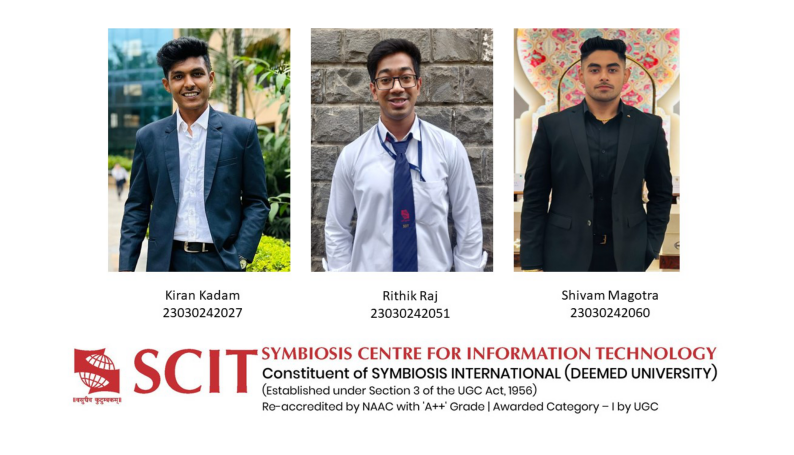

In [42]:
img_path = "C:/Users/rithi/OneDrive/Pictures/Screenshots/Slide1.JPG"
img = mpimg.imread(img_path)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
ax.axis('off')

plt.show()

In [1]:
'''
Problem Statement: Evaluating Premium Subscription Willingness Prediction Models for Spotify Users.

Introduction: Spotify, a leading music streaming platform, is keen on enhancing its premium subscription offerings.
To achieve this, the company is exploring predictive models that can estimate users' willingness to subscribe to premium plans
based on various user attributes and preferences.
    
    The dataset, comprising information such as age, gender, music preferences, podcast habits, and subscription history, 
is available for analysis. The primary goal is to build and evaluate machine learning models capable of predicting whether a
user is likely to subscribe to Spotify's premium plans.

Solution: 

1 Data Exploration and Preprocessing: Analyze the dataset to understand its structure, identify missing values, and preprocess
the data accordingly. Visualize relevant features to gain insights into user demographics, preferences, and behavior.

2 Feature Selection and Encoding: Employ techniques like LASSO regression for feature selection. Utilize label encoding to 
convert categorical variables into a format suitable for machine learning models.

3 Model Building: Implement three distinct models—Logistic Regression, Decision Tree, and XGBoost.
Train the models on the dataset to predict users' premium subscription willingness.

4 Model Evaluation: Evaluate the performance of each model using metrics such as accuracy, precision, recall, and F1 score.
Visualize the comparison of model metrics using an aesthetically pleasing bar chart.

5 Recommendations: Provide insights into the strengths and weaknesses of each model. Offer recommendations for refining 
Spotify's premium subscription strategies based on the model evaluations. Through this analysis, Spotify aims to gain valuable
insights into the factors influencing premium subscription willingness and use these insights to enhance user engagement and
satisfaction.

'''

"\nProblem Statement: Evaluating Premium Subscription Willingness Prediction Models for Spotify Users.\n\nIntroduction: Spotify, a leading music streaming platform, is keen on enhancing its premium subscription offerings.\nTo achieve this, the company is exploring predictive models that can estimate users' willingness to subscribe to premium plans\nbased on various user attributes and preferences.\n    \n    The dataset, comprising information such as age, gender, music preferences, podcast habits, and subscription history, \nis available for analysis. The primary goal is to build and evaluate machine learning models capable of predicting whether a\nuser is likely to subscribe to Spotify's premium plans.\n\nSolution: \n\n1 Data Exploration and Preprocessing: Analyze the dataset to understand its structure, identify missing values, and preprocess\nthe data accordingly. Visualize relevant features to gain insights into user demographics, preferences, and behavior.\n\n2 Feature Selection 

In [2]:
df=pd.read_excel("C:/Users/rithi/Downloads/Spotify_data.xlsx")
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [3]:
#Checking Datatypes
df.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [4]:
#Checking Missing Values
df.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

In [5]:
#Collecting null values
nan_values = df.isna()
print(nan_values)

       Age  Gender  spotify_usage_period  spotify_listening_device  \
0    False   False                 False                     False   
1    False   False                 False                     False   
2    False   False                 False                     False   
3    False   False                 False                     False   
4    False   False                 False                     False   
..     ...     ...                   ...                       ...   
515  False   False                 False                     False   
516  False   False                 False                     False   
517  False   False                 False                     False   
518  False   False                 False                     False   
519  False   False                 False                     False   

     spotify_subscription_plan  premium_sub_willingness  \
0                        False                    False   
1                        False           

In [6]:
# Null values counting
any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")
        
print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)


-----> Column 'preffered_premium_plan' has 208 missing values.
-----> Column 'fav_pod_genre' has 148 missing values.
-----> Column 'preffered_pod_format' has 140 missing values.
-----> Column 'pod_host_preference' has 141 missing values.
-----> Column 'preffered_pod_duration' has 129 missing values.

Missing Values in the Entire DataFrame?
True

Missing Values in Each Column?
Age                            False
Gender                         False
spotify_usage_period           False
spotify_listening_device       False
spotify_subscription_plan      False
premium_sub_willingness        False
preffered_premium_plan          True
preferred_listening_content    False
fav_music_genre                False
music_time_slot                False
music_Influencial_mood         False
music_lis_frequency            False
music_expl_method              False
music_recc_rating              False
pod_lis_frequency              False
fav_pod_genre                   True
preffered_pod_format         

In [7]:
#Dropping null values
df = df.dropna(subset=['preffered_premium_plan'])
df = df.dropna(subset=['fav_pod_genre'])
df = df.dropna(subset=['preffered_pod_format'])
df = df.dropna(subset=['pod_host_preference'])
df = df.dropna(subset=['preffered_pod_duration'])

In [8]:
# Checking df again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 0 to 518
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          224 non-null    object
 1   Gender                       224 non-null    object
 2   spotify_usage_period         224 non-null    object
 3   spotify_listening_device     224 non-null    object
 4   spotify_subscription_plan    224 non-null    object
 5   premium_sub_willingness      224 non-null    object
 6   preffered_premium_plan       224 non-null    object
 7   preferred_listening_content  224 non-null    object
 8   fav_music_genre              224 non-null    object
 9   music_time_slot              224 non-null    object
 10  music_Influencial_mood       224 non-null    object
 11  music_lis_frequency          224 non-null    object
 12  music_expl_method            224 non-null    object
 13  music_recc_rating            224 non-nul

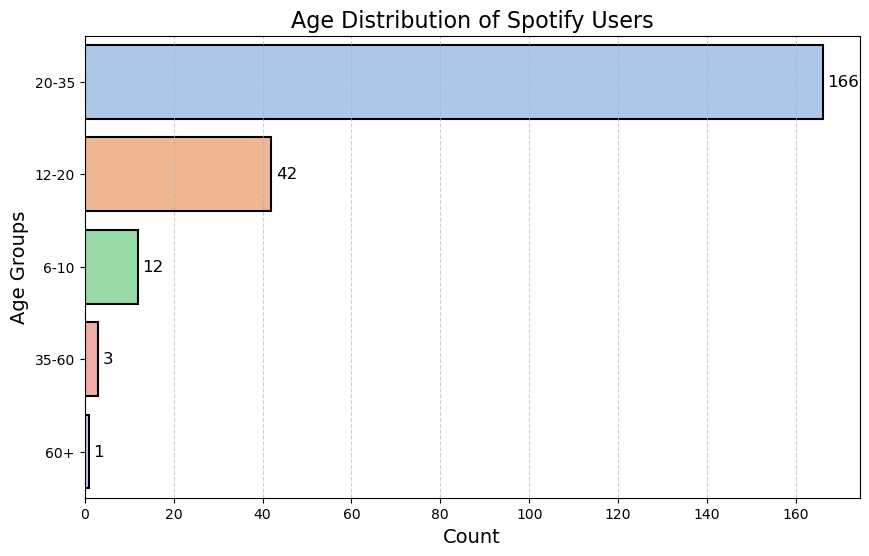

In [9]:
# Visualizing age distribution with a horizontal bar chart
y_age = df['Age'].value_counts()
labels_age = ['20-35', '12-20', '6-10', '35-60', '60+']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=y_age, y=labels_age, palette='pastel', edgecolor='black', linewidth=1.5)

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="left", va="center", fontsize=12, color='black')

plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Groups', fontsize=14)
plt.title('Age Distribution of Spotify Users', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.show()

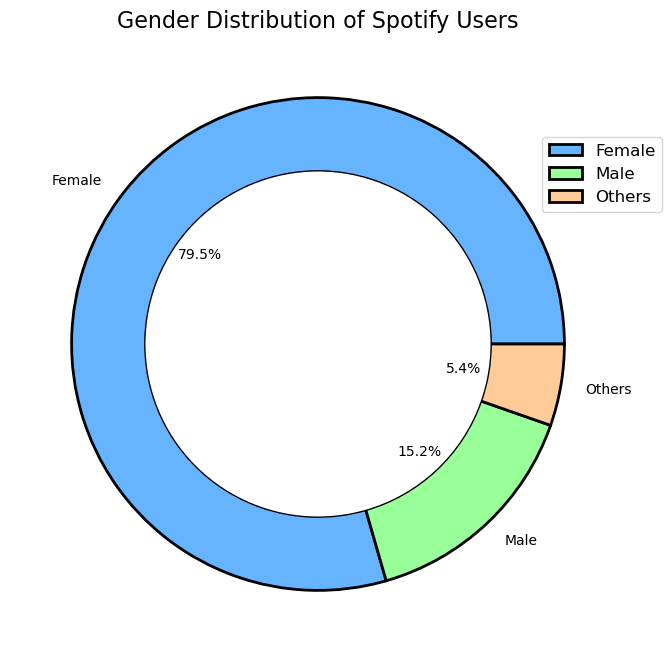

In [10]:
# Gender
y = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))

colors = ['#66b3ff', '#99ff99', '#ffcc99']  
labels = ['Female', 'Male', 'Others']

# Add a boundary to the pie chart
plt.pie(y, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3, edgecolor='black', linewidth=2))

# Add a circle in the center to make it more attractive
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the legend with a beautiful layout
plt.legend(loc='upper left', bbox_to_anchor=(0.85, 0.85), fontsize=12)

# Add a title
plt.title('Gender Distribution of Spotify Users', fontsize=16)

plt.show()


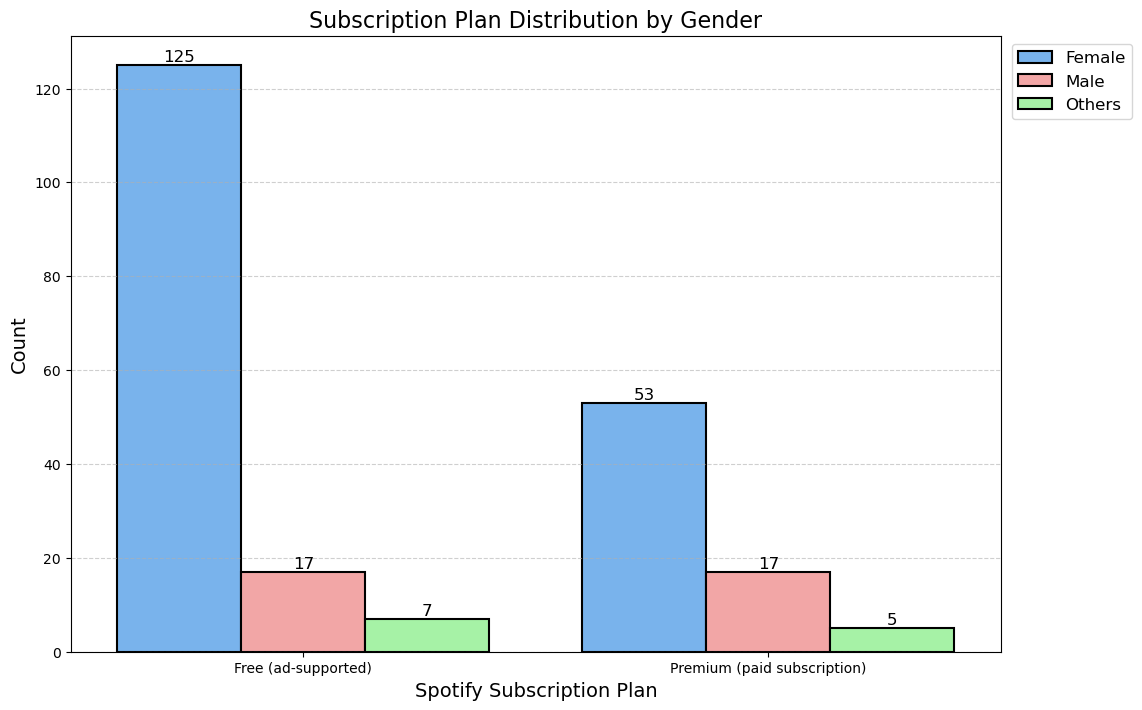

In [11]:
# Spotify Subscription Plan
custom_palette = {'Male': '#ff9999', 'Female': '#66b3ff', 'Others': '#99ff99'}  
plt.figure(figsize=(12, 8))

# Add a boundary to the bars
ax = sns.countplot(x='spotify_subscription_plan', data=df, hue='Gender', palette=custom_palette, edgecolor='black', linewidth=1.5)

# Add data values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center", va="bottom", fontsize=12, color='black')

# Display a legend with a beautiful layout
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=12)

# Add a title
plt.title('Subscription Plan Distribution by Gender', fontsize=16)
plt.xlabel('Spotify Subscription Plan', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


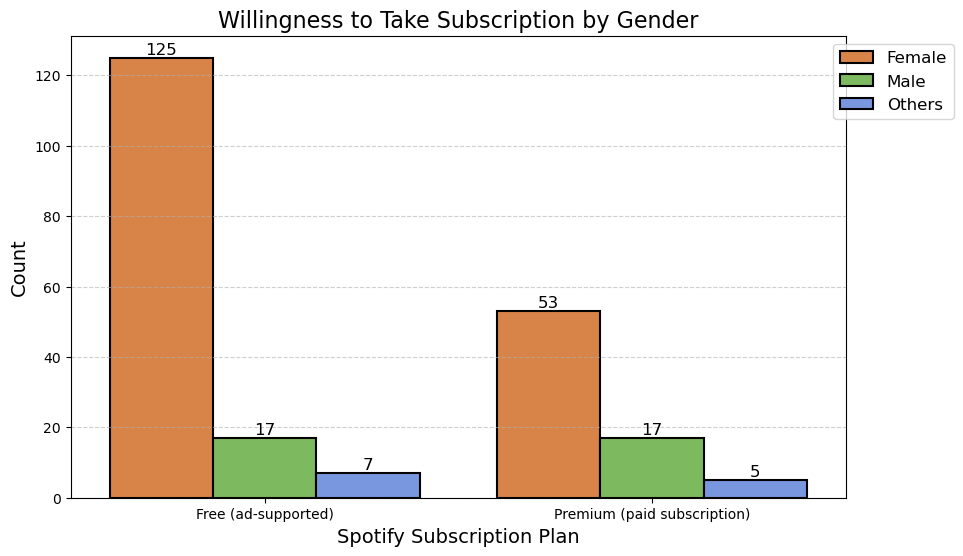

In [12]:
# Willingness to take subscription
custom_palette = {'Male': '#78C850', 'Female': '#F08030', 'Others': '#6890F0'}  
plt.figure(figsize=(10, 6))

# Add a boundary to the bars
ax = sns.countplot(x='spotify_subscription_plan', data=df, hue='Gender', palette=custom_palette, edgecolor='black', linewidth=1.5)

# Add data values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center", va="bottom", fontsize=12, color='black')

# Display a legend with a beautiful layout
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=12)

# Add a title
plt.title('Willingness to Take Subscription by Gender', fontsize=16)
plt.xlabel('Spotify Subscription Plan', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


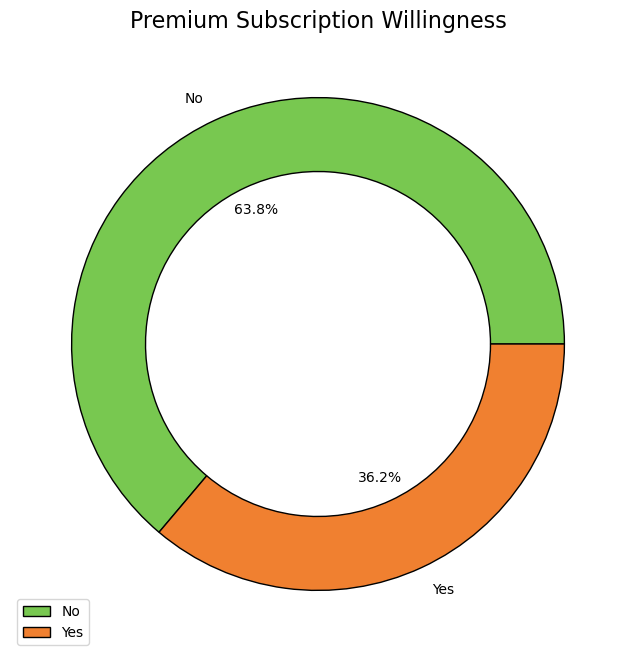

In [13]:
# Premium Subscription willingness
custom_colors = ['#78C850', '#F08030']  
y_premium = df['premium_sub_willingness'].value_counts()
labels_premium = ['No', 'Yes']
plt.figure(figsize=(8, 8))

# Add a boundary to the pie chart
plt.pie(y_premium, labels=labels_premium, autopct='%1.1f%%', colors=custom_colors, wedgeprops=dict(width=0.3, edgecolor='black'))

# Display a legend with a beautiful layout
plt.legend(loc='lower left')

# Add a title
plt.title('Premium Subscription Willingness', fontsize=16)

plt.show()


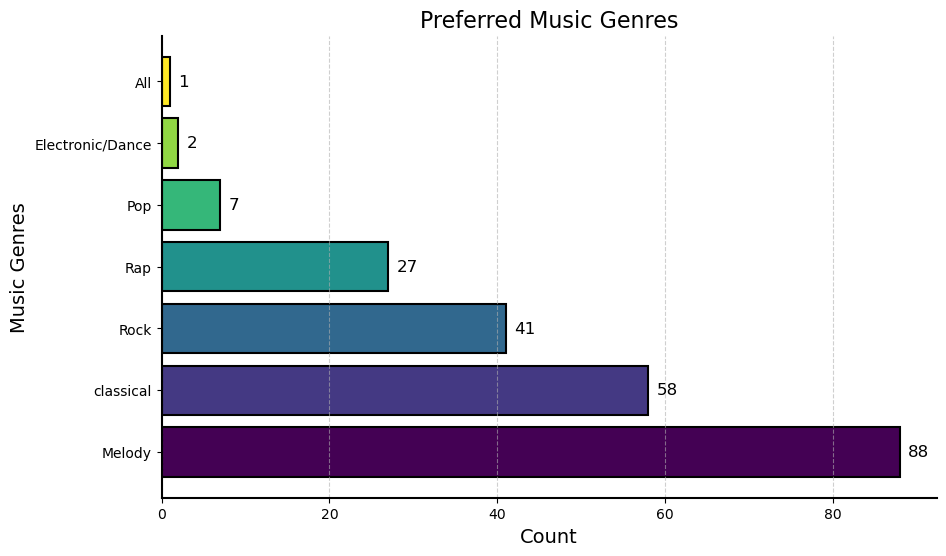

In [14]:
# Favorite Genre
fig, ax = plt.subplots(figsize=(10, 6))

y2 = df['fav_music_genre'].value_counts().values
x2 = df['fav_music_genre'].unique()

plt.barh(x2, y2, color=plt.cm.viridis(np.linspace(0, 1, len(x2))), edgecolor='black', linewidth=1.5)

# Adding data values on the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="left", va="center", fontsize=12, color='black')

# Adding a boundary to the bars
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.xlabel('Count', fontsize=14)
plt.ylabel('Music Genres', fontsize=14)
plt.title('Preferred Music Genres', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6)  
plt.show()


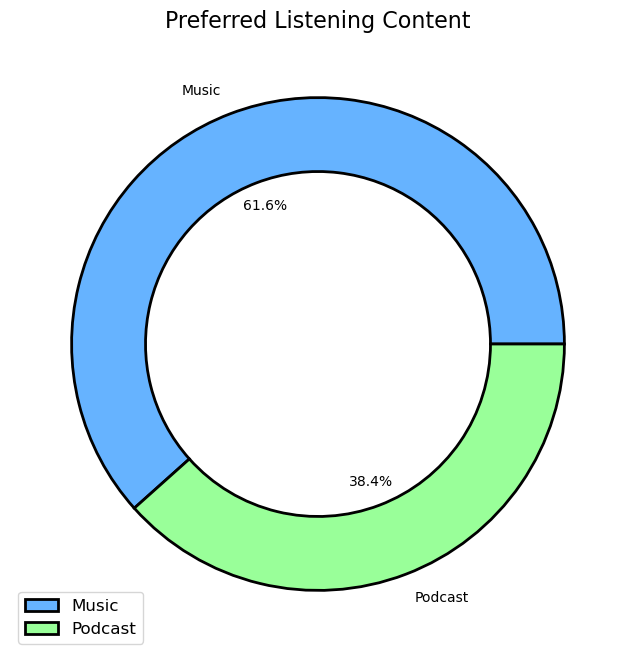

In [15]:
# Preferred Listening Content
y3 = df['preferred_listening_content'].value_counts()
labels = ['Music', 'Podcast']

custom_colors = ['#66b3ff', '#99ff99']

plt.figure(figsize=(8, 8))

plt.pie(y3, labels=labels, autopct='%1.1f%%', colors=custom_colors, wedgeprops=dict(width=0.3, edgecolor='black', linewidth=2))

plt.legend(loc='lower left', fontsize=12)

# Add a title
plt.title('Preferred Listening Content', fontsize=16)
plt.show()


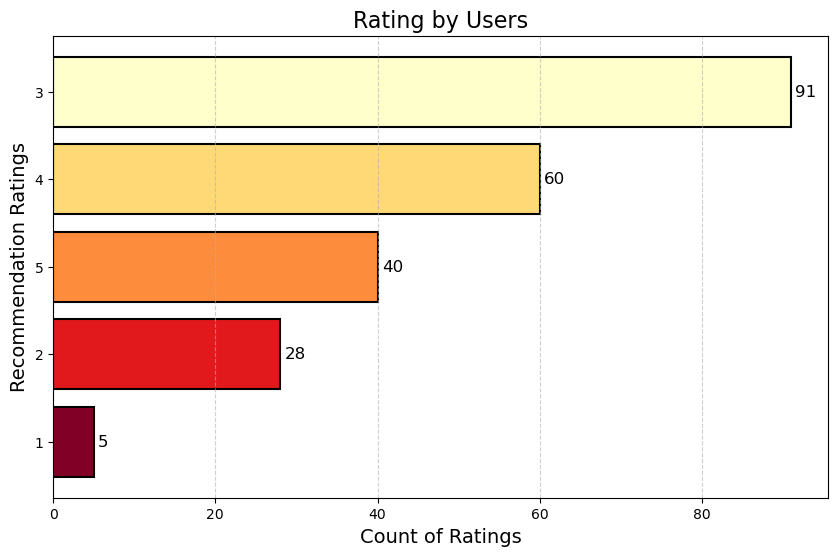

In [16]:
# Music Recommendation Rating
y4 = df['music_recc_rating'].value_counts().values
x4 = ['3', '4', '5', '2', '1']

plt.figure(figsize=(10, 6))

plt.barh(x4, y4, color=plt.cm.YlOrRd(np.linspace(0, 1, len(x4))), edgecolor='black', linewidth=1.5)

# Adding data values on the bars
for index, value in enumerate(y4):
    plt.text(value + 0.5, index, str(value), ha='left', va='center', fontsize=12, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding a boundary to the bars
plt.gca().invert_yaxis()  
plt.xlabel('Count of Ratings', fontsize=14)
plt.ylabel('Recommendation Ratings', fontsize=14)
plt.title('Rating by Users', fontsize=16)
plt.show()


In [17]:
le=LabelEncoder()
lst=['Age','Gender','spotify_usage_period','spotify_listening_device','spotify_subscription_plan','premium_sub_willingness','preffered_premium_plan','preferred_listening_content','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [18]:
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,1,0,3,4,0,1,1,1,2,2,8,25,3,3,0,0,2,0,0,1
8,1,0,2,6,0,1,2,0,2,0,4,22,5,4,3,0,3,1,2,2
16,1,0,2,6,0,1,2,0,2,0,0,22,5,1,0,0,1,1,1,2
23,1,0,3,8,1,1,2,0,6,2,6,20,14,1,3,0,2,0,2,4
24,1,1,3,7,1,1,1,0,5,2,1,11,16,3,3,7,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,1,0,3,6,0,0,3,0,2,2,0,0,9,4,3,2,1,0,2,2
512,1,0,3,6,0,1,2,0,2,2,1,19,10,4,2,12,3,0,0,2
515,1,0,3,10,0,1,3,0,3,1,12,18,9,5,3,7,0,0,2,1
516,1,0,3,7,0,1,3,0,3,2,6,20,0,2,3,0,3,0,2,1


In [19]:
# Splitting the dataset
X = df.drop(['premium_sub_willingness'], axis=1)
y = df['premium_sub_willingness']

In [20]:
# Using LASSO for feature selection
lasso = Lasso(alpha=0.01)  
lasso.fit(X, y)

Lasso(alpha=0.01)

In [21]:
# Select features based on LASSO model
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X)

C:\Users\rithi\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [22]:
# Get selected feature indices
selected_feature_indices = model.get_support(indices=True)

In [23]:
selected_features = X.columns[selected_feature_indices]

In [24]:
selected_features

Index(['Age', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'preffered_premium_plan',
       'preferred_listening_content', 'fav_music_genre',
       'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
       'pod_lis_frequency', 'fav_pod_genre', 'pod_variety_satisfaction'],
      dtype='object')

In [25]:
#Splitting the dataset for model building
X1=df.drop(['Age','music_recc_rating','fav_pod_genre','preffered_pod_format','premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']

In [26]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(X1)
Xsc

array([[0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.25      ],
       [0.        , 0.66666667, 0.42857143, ..., 0.5       , 1.        ,
        0.5       ],
       [0.        , 0.66666667, 0.42857143, ..., 0.5       , 0.5       ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.71428571, ..., 0.        , 1.        ,
        0.25      ],
       [0.        , 1.        , 0.5       , ..., 0.        , 1.        ,
        0.25      ],
       [0.        , 0.33333333, 0.42857143, ..., 0.        , 0.5       ,
        0.5       ]])

In [27]:
#Model building
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.2,random_state=42)

In [28]:
X_train.shape

(179, 15)

In [29]:
y_train.shape

(179,)

In [ ]:
"""
Logistic Regression is a statistical method used for binary classification, estimating the probability of an instance 
belonging to a particular class, implemented in scikit-learn.

"""

In [30]:
# Logistic Regression
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test)

In [ ]:
"""
Decision Tree Regression is a machine learning algorithm for predicting continuous values based on recursive partitioning 
of the feature space, implemented in scikit-learn.

"""

In [31]:
# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
dt_predictions = decision_tree_reg.predict(X_test)

In [ ]:
"""
XGBoost Regression is an ensemble learning algorithm for regression tasks, utilizing a collection of weak learners 
(decision trees) to improve predictive performance, implemented in XGBoost library.

"""

In [32]:
# XGBoost Regression
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_predictions = xgb_reg.predict(X_test)

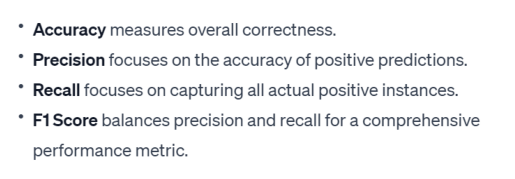

In [48]:
img1 = mpimg.imread("C:/Users/rithi/OneDrive/Pictures/Screenshots/Screenshot 2024-01-29 004512.png")
plt.imshow(img1)
plt.axis('off') 
plt.show()

In [33]:
# Function to calculate and print classification metrics
def calculate_metrics(y_true, y_pred, model_name):
    # Convert continuous predictions to binary labels using a threshold (e.g., 0.5)
    y_pred_binary = (y_pred >= 0.5).astype(int)

    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

In [35]:
# Calculate metrics for each model
calculate_metrics(y_test, logistic_reg_predictions, "Logistic Regression")
calculate_metrics(y_test, dt_predictions, "Decision Tree")
calculate_metrics(y_test, xgb_predictions, "XGBoost")

Logistic Regression Metrics:
Accuracy: 0.6666666666666666
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1 Score: 0.7692307692307692


Decision Tree Metrics:
Accuracy: 0.6
Precision: 0.75
Recall: 0.6
F1 Score: 0.6666666666666665


XGBoost Metrics:
Accuracy: 0.6666666666666666
Precision: 0.7777777777777778
Recall: 0.7
F1 Score: 0.7368421052631577




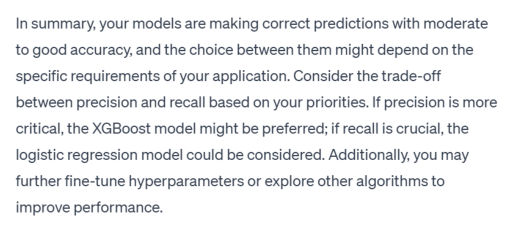

In [36]:
img = mpimg.imread("C:/Users/rithi/OneDrive/Pictures/Screenshots/Screenshot 2024-01-29 003617.png")
plt.imshow(img)
plt.axis('off') 
plt.show()

In [37]:
# Approximate Metrics for each model
models = ['Logistic Regression', 'Decision Tree', 'XGBoost']
accuracy = [0.6667, 0.6, 0.6667]
precision = [0.7143, 0.75, 0.7778]
recall = [0.8333, 0.6, 0.7]
f1_score = [0.7692, 0.6667, 0.7368]

In [38]:
# Create a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

In [39]:
# Print the DataFrame
print("Model Comparison:")
print(results_df)

Model Comparison:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.6667     0.7143  0.8333    0.7692
1        Decision Tree    0.6000     0.7500  0.6000    0.6667
2              XGBoost    0.6667     0.7778  0.7000    0.7368


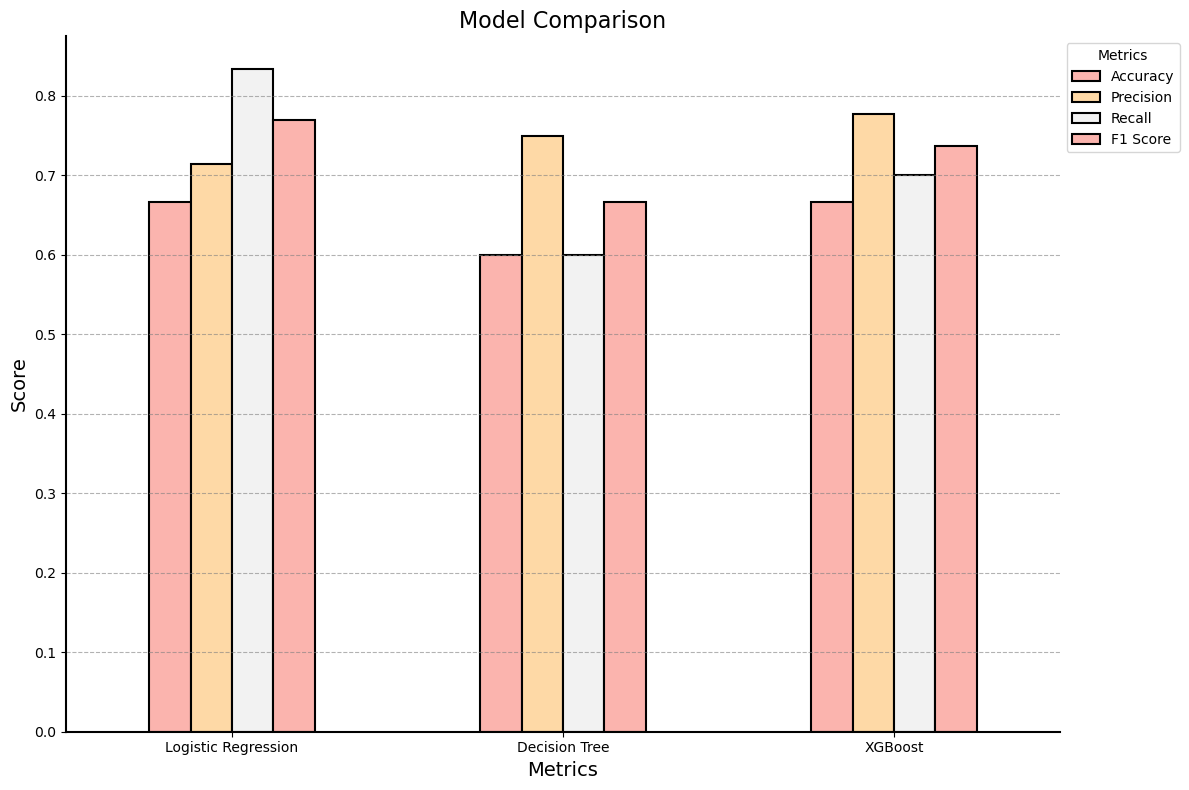

In [40]:
# Plot the metrics using a bar chart
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.Pastel1(np.linspace(0, 1, len(results_df['Model'])))

# Plotting bar chart
results_df.set_index('Model').plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=1.5)

# Adding a boundary to the bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.6)

plt.title('Model Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metrics', fontsize=10)

plt.tight_layout()  
plt.show()


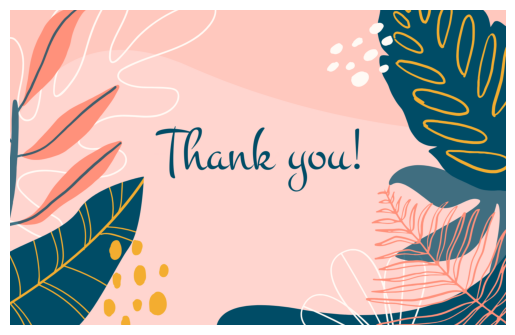

In [49]:
img = mpimg.imread("C:/Users/rithi/OneDrive/Pictures/Screenshots/wepik-creative-design-thank-you-label-20240129095139S1tV.png")
plt.imshow(img)
plt.axis('off') 
plt.show()